In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BCSdata.csv')
df.tail()

,Alias,Well,Reservoir,Date,Days,"Oil Rate, BOPD","Water Rate, BWPD","Gas Rate, MSCF/D","K, mD","h, ft","Depth_avg, ft","P, psi","Pwf, psi"
9071,BCS0070:M18,BCS0070,M18,41944,30.000000,405.6,1435.3,252.1,1.24,77.0,9357,2977,1907
9072,BCS0070:M18,BCS0070,M18,41974,31.000000,488.4,1570.0,321.8,1.24,77.0,9357,2976,1687
9073,BCS0070:M18,BCS0070,M18,42005,30.999999,868.5,1549.7,209.7,1.24,77.0,9357,2974,683
9074,BCS0070:M18,BCS0070,M18,42036,28.000000,777.5,1459.2,220.4,1.24,77.0,9357,2973,921
9075,BCS0070:M18,BCS0070,M18,42064,30.999999,875.3,1414.5,235.8,1.24,77.0,9357,2972,662


In [3]:
X = df[["Well", "Reservoir", "Date", "K, mD", "h, ft", "P, psi", "Pwf, psi"]]
y = df[["Oil Rate, BOPD", "Water Rate, BWPD", "Gas Rate, MSCF/D"]]
X.tail(10)

,Well,Reservoir,Date,"K, mD","h, ft","P, psi","Pwf, psi"
9066,BCS0070,M18,41791,1.24,77.0,2984,1105
9067,BCS0070,M18,41821,1.24,77.0,2983,1622
9068,BCS0070,M18,41852,1.24,77.0,2981,2014
9069,BCS0070,M18,41883,1.24,77.0,2980,1770
9070,BCS0070,M18,41913,1.24,77.0,2978,1691
9071,BCS0070,M18,41944,1.24,77.0,2977,1907
9072,BCS0070,M18,41974,1.24,77.0,2976,1687
9073,BCS0070,M18,42005,1.24,77.0,2974,683
9074,BCS0070,M18,42036,1.24,77.0,2973,921
9075,BCS0070,M18,42064,1.24,77.0,2972,662


In [4]:
print(X.shape, y.shape)

(9076, 7) (9076, 3)


In [5]:
# Use Pandas get_dummies to convert categorical data
X= pd.get_dummies(X)
X.tail(10)

,Date,"K, mD","h, ft","P, psi","Pwf, psi",Well_BCS0006,Well_BCS0007,Well_BCS0007A,Well_BCS0018,Well_BCS0023,...,Well_BCS0063,Well_BCS0064,Well_BCS0066,Well_BCS0069,Well_BCS0070,Reservoir_M06,Reservoir_M18,Reservoir_P21,Reservoir_P35,Reservoir_P39
9066,41791,1.24,77.0,2984,1105,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9067,41821,1.24,77.0,2983,1622,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9068,41852,1.24,77.0,2981,2014,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9069,41883,1.24,77.0,2980,1770,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9070,41913,1.24,77.0,2978,1691,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9071,41944,1.24,77.0,2977,1907,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9072,41974,1.24,77.0,2976,1687,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9073,42005,1.24,77.0,2974,683,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9074,42036,1.24,77.0,2973,921,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9075,42064,1.24,77.0,2972,662,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [6]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
y_train.tail(10)

,"Oil Rate, BOPD","Water Rate, BWPD","Gas Rate, MSCF/D"
8322,756.3,965.2,37.6
5578,72.5,6.9,58.3
4426,0.0,0.0,0.0
466,1518.2,132.0,180.3
6265,353.0,278.4,77.3
5734,408.9,613.2,432.8
5191,1266.6,2954.7,166.4
5390,295.2,1187.9,114.7
860,0.0,0.0,0.0
7270,318.4,1608.4,474.4


## Linear Regression

In [8]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

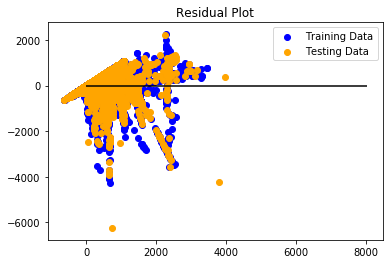

In [9]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.savefig("residualRegression.png")
plt.show()

In [10]:
(y_test - predictions).tail(10)

,"Oil Rate, BOPD","Water Rate, BWPD","Gas Rate, MSCF/D"
5910,23.896421,-82.521201,305.226382
1221,1225.066230,-96.780374,251.069272
7841,496.178043,-255.613812,109.067984
437,445.822860,-123.569949,46.044916
8391,-442.838030,-163.884943,-231.235459
3914,66.970142,-638.922353,863.370406
6113,-111.104821,387.509252,54.093880
4830,-733.729006,121.473233,-100.923527
7288,39.500525,930.325755,-79.779465
8328,27.004050,20.517906,9.399324


In [11]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 163021.5642893565, R2: 0.47707356731669603


C:\Users\Jose Luis\AppData\Local\Continuum\anaconda3\envs\PythonData37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
